In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Datasets/archive.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf # Import TensorFlow
from glob import glob
from tensorflow.keras.models import Sequential # Use tensorflow.keras for models
from tensorflow.keras.layers import BatchNormalization,MaxPooling2D,Dense,Conv2D,Flatten, Dropout # Use tensorflow.keras for layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use tensorflow.keras for ImageDataGenerator

import warnings
from tqdm import tqdm
from PIL import Image
warnings.filterwarnings('ignore')

In [ ]:

df=pd.DataFrame(columns=['image','label'])

In [ ]:
import pandas as pd
from glob import glob
from tqdm import tqdm
from PIL import Image
import numpy as np

df = pd.DataFrame(columns=['image', 'label'])
idx = 0

for name in tqdm(glob('../content/data/vehicles/*')):
    image = Image.open(name)
    img_seq = image.getdata()
    img = np.array(img_seq)
    img = np.reshape(img, (64, 64, 3))
    data = pd.DataFrame({'image': [img], 'label': [1]}, index=[idx])
    # Use pd.concat instead of append
    df = pd.concat([df, data])
    idx += 1

100%|██████████| 8792/8792 [00:31<00:00, 283.52it/s]


In [ ]:
import pandas as pd
from glob import glob
from tqdm import tqdm
from PIL import Image
import numpy as np

df = pd.DataFrame(columns=['image', 'label'])
idx = 0

for name in tqdm(glob('../content/data/vehicles/*')):
    image = Image.open(name)
    img_seq = image.getdata()
    img = np.array(img_seq)
    img = np.reshape(img, (64, 64, 3))
    data = pd.DataFrame({'image': [img], 'label': [1]}, index=[idx])
    # Use pd.concat instead of append
    df = pd.concat([df, data])
    idx += 1

for name in tqdm(glob('..//content/data/non-vehicles/*')):
    image = Image.open(name)
    img_seq = image.getdata()
    img = np.array(img_seq)
    img = np.reshape(img, (64, 64, 3))
    data = pd.DataFrame({'image': [img], 'label': [0]}, index=[idx])
    # Use pd.concat instead of append
    df = pd.concat([df, data])
    idx += 1

100%|██████████| 8968/8968 [00:31<00:00, 282.03it/s]


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
split=StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)
for train_index,test_index in split.split(df,df['label']):
    train_data=df.iloc[train_index]
    test_data=df.iloc[test_index]

In [ ]:

train_img,train_label=train_data['image'],train_data['label']
test_img,test_label=test_data['image'],test_data['label']

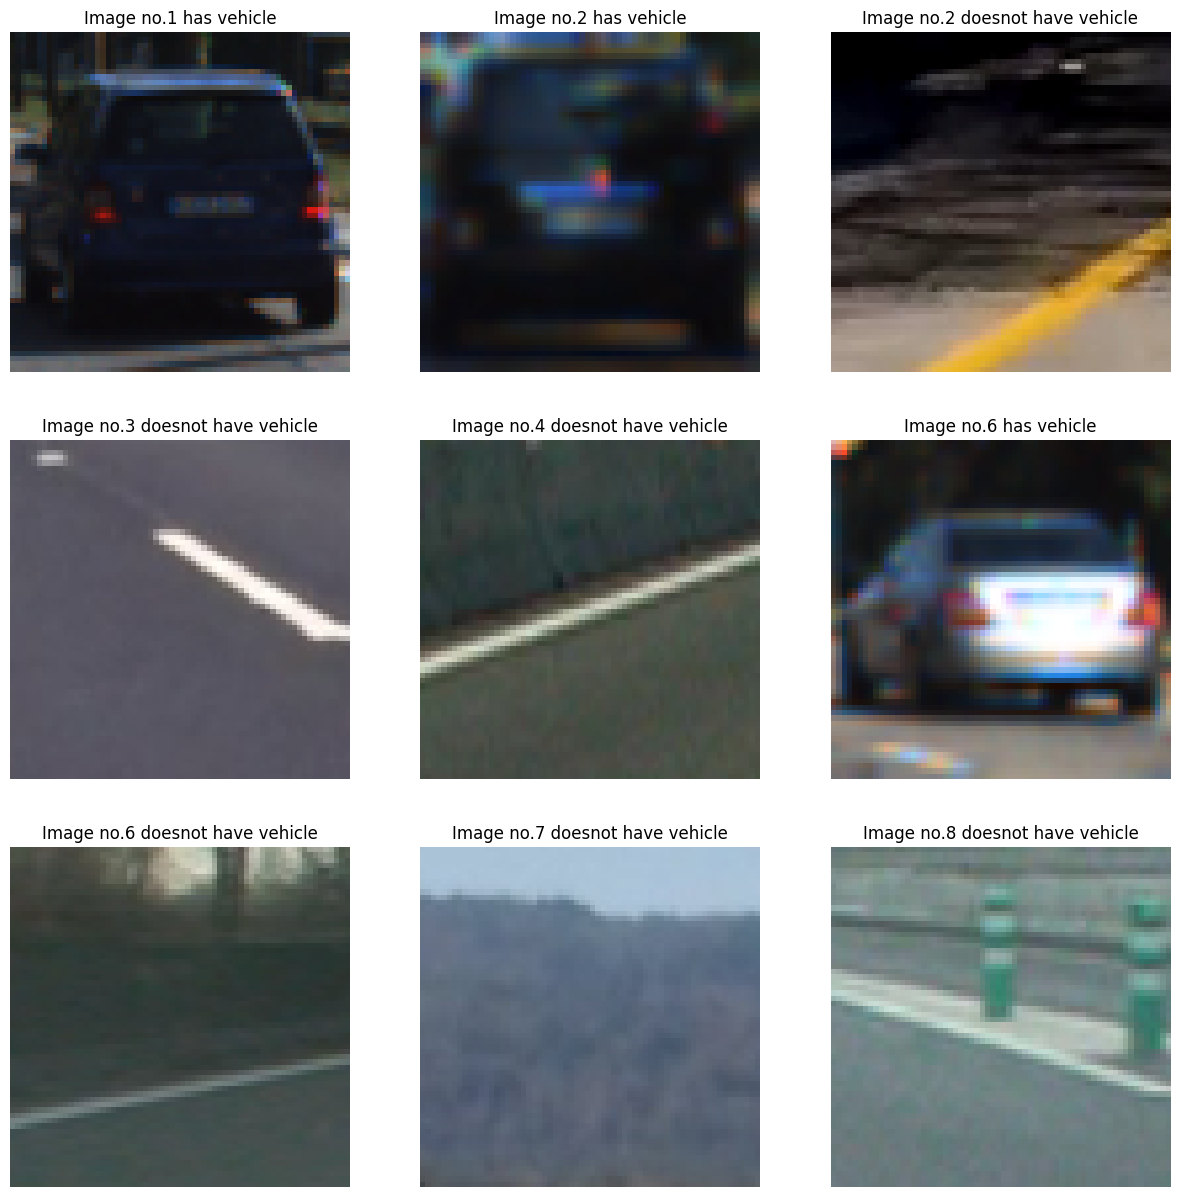

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,(i%9)+1)
    ix=np.random.randint(3000)
    if(train_label.iloc[ix]==1):
        plt.title('Image no.{0} has vehicle'.format(i+1))
    elif(train_label.iloc[ix]==0):
        plt.title('Image no.{0} doesnot have vehicle'.format(i))
    plt.axis('off')
    plt.imshow(train_img.iloc[ix])
plt.show()

In [ ]:

def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),64,64,3))
    return data

In [ ]:

train_img=change_image_dimension(train_img)
test_img=change_image_dimension(test_img)
# train_img
train_img=train_img/255.0
test_img=test_img/255.0

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:

train_label=np.array(train_label,dtype=int)
test_label=np.array(test_label,dtype=int)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 9, 9, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 844,577 (3.22 MB)

 Trainable params: 844,577 (3.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
r=model.fit(train_img,train_label,validation_data=(test_img,test_label),epochs=100,batch_size=32,)

Epoch 1/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8124 - loss: 0.3830 - val_accuracy: 0.9189 - val_loss: 0.1899
Epoch 2/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9506 - loss: 0.1362 - val_accuracy: 0.9718 - val_loss: 0.0731
Epoch 3/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9767 - loss: 0.0718 - val_accuracy: 0.9655 - val_loss: 0.1186
Epoch 4/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9843 - loss: 0.0530 - val_accuracy: 0.9876 - val_loss: 0.0347
Epoch 5/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9837 - loss: 0.0488 - val_accuracy: 0.9872 - val_loss: 0.0420
Epoch 6/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9840 - loss: 0.0421 - val_accuracy: 0.9820 - val_loss: 0.0498
Epoch 7/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9824 - loss: 0.0516 - val_accuracy: 0.9741 - val_loss: 0.0599
Epoch 8/100
472/472 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9802 - loss: 0.0587 

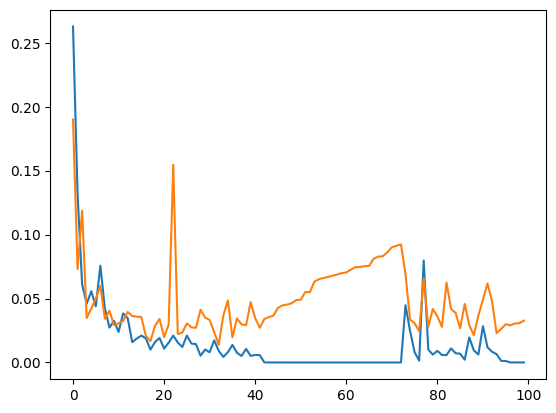

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [ ]:
r=model.fit(train_img,train_label,validation_data=(test_img,test_label),epochs=3,batch_size=32,)

Epoch 1/3
472/472 ━━━━━━━━━━━━━━━━━━━━ 338s 717ms/step - accuracy: 0.9954 - loss: 0.0188 - val_accuracy: 0.9854 - val_loss: 0.0446
Epoch 2/3
472/472 ━━━━━━━━━━━━━━━━━━━━ 317s 671ms/step - accuracy: 0.9878 - loss: 0.0361 - val_accuracy: 0.9940 - val_loss: 0.0269
Epoch 3/3
472/472 ━━━━━━━━━━━━━━━━━━━━ 328s 684ms/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9947 - val_loss: 0.0224


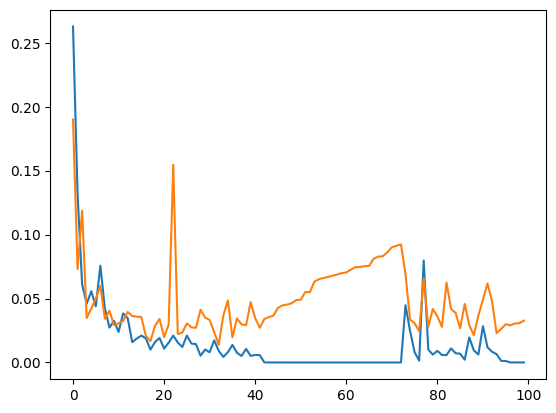

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

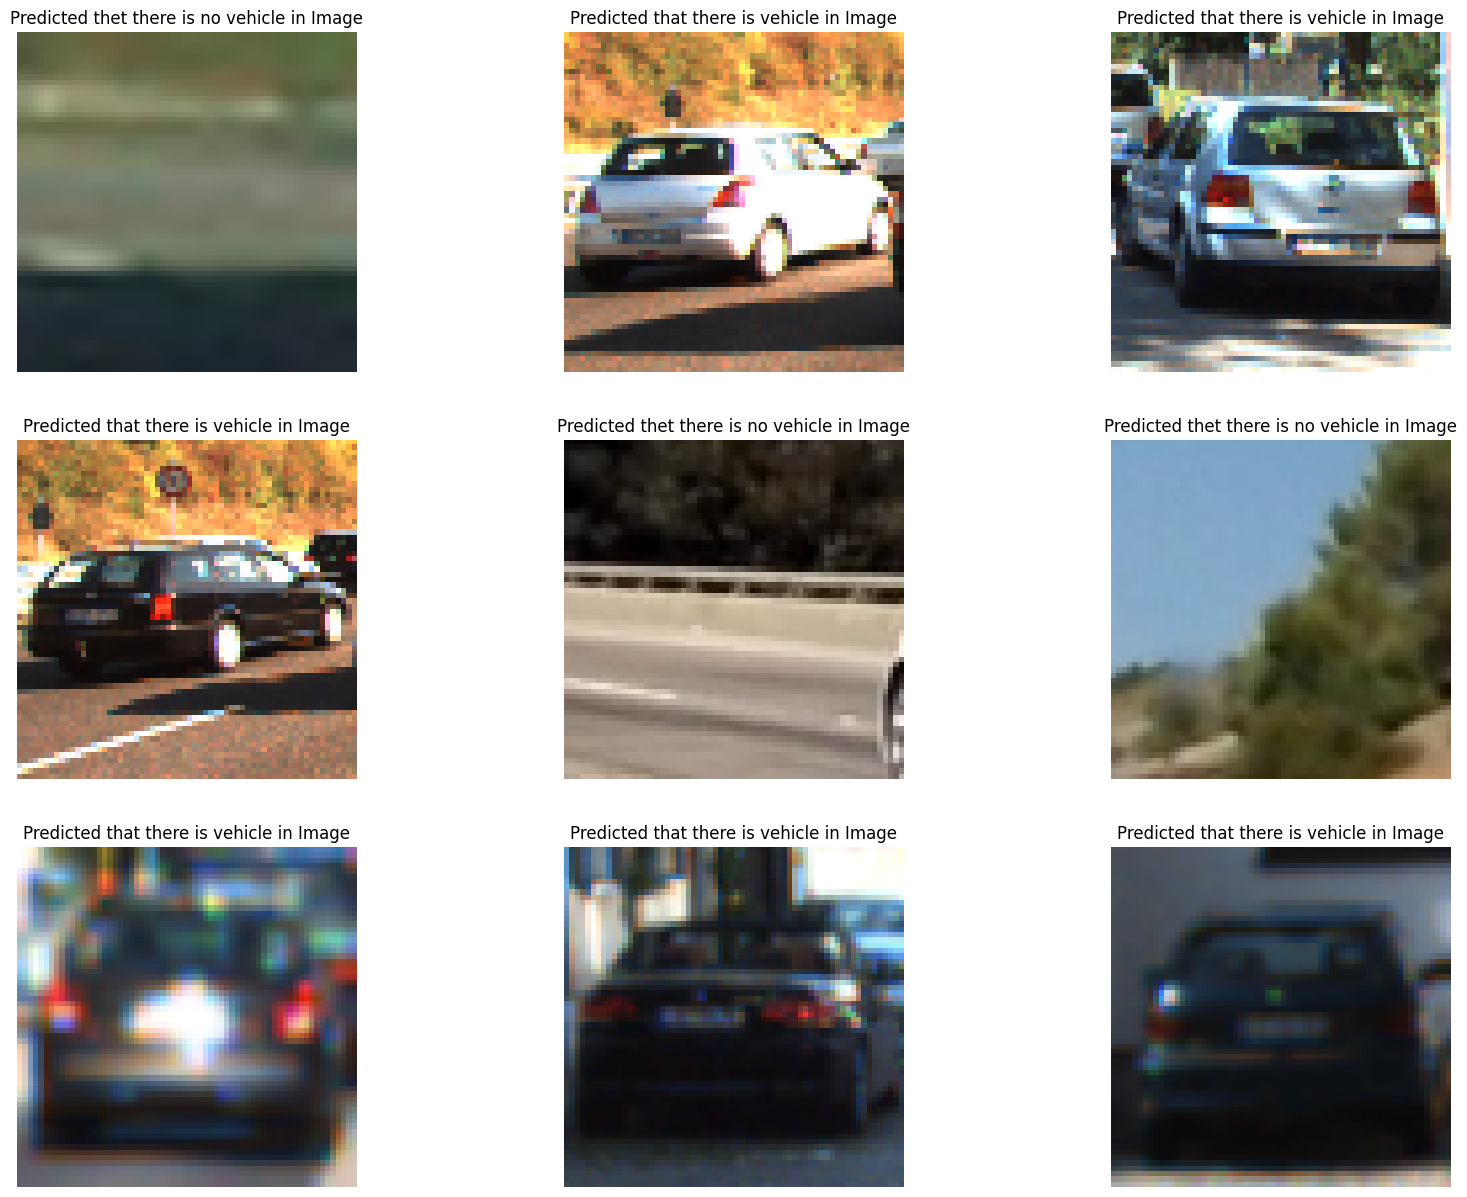

In [ ]:

plt.figure(figsize=(20,15))
for i in range(30):
    plt.subplot(3,3,(i%9)+1)
    rd_idx=np.random.randint(700)
    pred_test=model.predict(np.reshape(test_img[rd_idx],(-1,64,64,3)))
    if pred_test==1:
        plt.title('Predicted that there is vehicle in Image')
    else:
        plt.title('Predicted thet there is no vehicle in Image')
    plt.axis('off')
    plt.imshow(test_img[rd_idx])
plt.show()

In [ ]:
model.save('/content/Datasets/mymodel.h5')

In [ ]:
# Instead of:
# from keras.saving.saving_lib import load_model

# Use this:
# The model is already loaded previously, no need to import/load again
# import tensorflow as tf
# model = tf.keras.models.load_model('/content/data/mymodel.h5')

import numpy as np
import tensorflow as tf
from keras.preprocessing import image
# Avoid redundant import, use the alias if needed
# from keras.preprocessing import image
import keras.utils as image

# Load the trained model - This line is already executed in previous cells
# model = tf.keras.models.load_model('/content/data/mymodel.h5')

# Function to preprocess the input image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Function to classify the image
def classify_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    if prediction[0][0] >= 0.5:
        return "Vehicle"
    else:
        return "Non-Vehicle"

# Provide the path to the image you want to test
image_path = "/content/drive/MyDrive/Datasets/non1.jpg"

# Classify the image
result = classify_image(image_path)
print("Image classification result:", result)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Datasets/non1.jpg'

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg

--2024-11-08 06:36:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  26.1MB/s    in 8.0s    

2024-11-08 06:36:53 (29.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-11-08 06:36:53--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2024-11-08 06:36:53--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.c

In [ ]:
import cv2
import numpy as np

# Load YOLOv3 model and COCO class names
weights_path = "yolov3.weights"
config_path = "yolov3.cfg"
class_names_path = '/content/drive/MyDrive/Datasets/coco.names'  # Update with your coco1.names path

# Load class labels
with open(class_names_path, "r") as f:
    class_names = [line.strip() for line in f.readlines()]

# Load YOLO model
net = cv2.dnn.readNet(weights_path, config_path)

# Set the classes related to vehicles
vehicle_classes = ["car", "motorbike", "bus", "truck"]

# Function to count vehicles
def count_vehicles(image_path):
    # Load the image
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Preprocess image for YOLO
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layer names
    layer_names = net.getUnconnectedOutLayersNames()
    detections = net.forward(layer_names)

    vehicle_count = 0

    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Filter for vehicle classes with confidence threshold
            if confidence > 0.5 and class_names[class_id] in vehicle_classes:
                vehicle_count += 1

    return vehicle_count

# Test the function
image_path = "/content/drive/MyDrive/Datasets/multi1.jpg"  # Replace with your image path
vehicle_count = count_vehicles(image_path)
print("Total vehicles detected:", vehicle_count)

error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/darknet/darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: yolov3.cfg in function 'readNetFromDarknet'
